# Day 08. Exercise 04
# Regression

## 0. Imports

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [56]:
df = pd.read_csv('../data/checker_regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    59 non-null     float64
 3   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [51]:
df.fillna(0, inplace=True)

In [52]:
X = df.drop(['uid', 'AVG(diff)'], axis=1).values
y = df['AVG(diff)']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [38]:
def crossval(n_splits, X, y, model):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

  ft_m = model.fit(X_train, y_train)
  scores = cross_val_score(model, X_train, y_train, cv=n_splits)
  scores_test = cross_val_score(model, X_test, y_test, cv=n_splits)
  predict = cross_val_predict(ft_m, X_test, y_test, cv=n_splits)
  scoring = metrics.mean_squared_error(y_test, predict)

  for i in range(0, len(scores)):
    print(f'train - {scores[i]} | test - {scores_test[i]}')
  print(f'Average RMSE on crossval is {scoring}')

In [39]:
model = linear_model.LinearRegression()
crossval(8, X, y, model)

train - 0.0 | test - -15.529837469828763
train - 0.09634118299044436 | test - -2.0340036622429674
train - 0.16802422878337786 | test - 0.0
train - -1771.9284848512075 | test - 0.0
train - -0.8196283088872804 | test - -0.19004831612339035
train - -3.665545454905666 | test - 0.0
train - -0.16744713998430294 | test - 0.0
train - 0.008390220241995983 | test - 0.0
Average RMSE on crossval is 4266.529413666603


In [40]:
dt = DecisionTreeRegressor()
crossval(8, X, y, dt)

train - 1.0 | test - -276.40218775510203
train - 0.8116711246796533 | test - -1.8335418024977814
train - -0.5723412597983533 | test - 1.0
train - -1920.142857142857 | test - 0.0
train - 0.4406701903593837 | test - 0.5858477464966545
train - -26.212876085962503 | test - 1.0
train - -1.109925198965077 | test - 1.0
train - 0.5228262335247476 | test - 1.0
Average RMSE on crossval is 5491.37


In [41]:
rf = RandomForestRegressor()
crossval(8, X, y, rf)

train - 1.0 | test - -112.27619137306147
train - 0.6671849815723714 | test - -1.5461805981146122
train - 0.4836734348138986 | test - 0.0
train - -2581.2460701269824 | test - 0.0
train - 0.543917566619471 | test - 0.9805223863148594
train - -23.329658987755884 | test - 1.0
train - 0.0918302246476177 | test - 0.0
train - 0.4443045830895037 | test - 0.0
Average RMSE on crossval is 4284.957030687502


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [42]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
pred = linear_regression.predict(x_test)
mse_model = metrics.mean_squared_error(y_test, pred)
print(mse_model)
print("R^2:", linear_regression.score(x_test, y_test))

2928.2299610644113
R^2: 0.09233548621577625


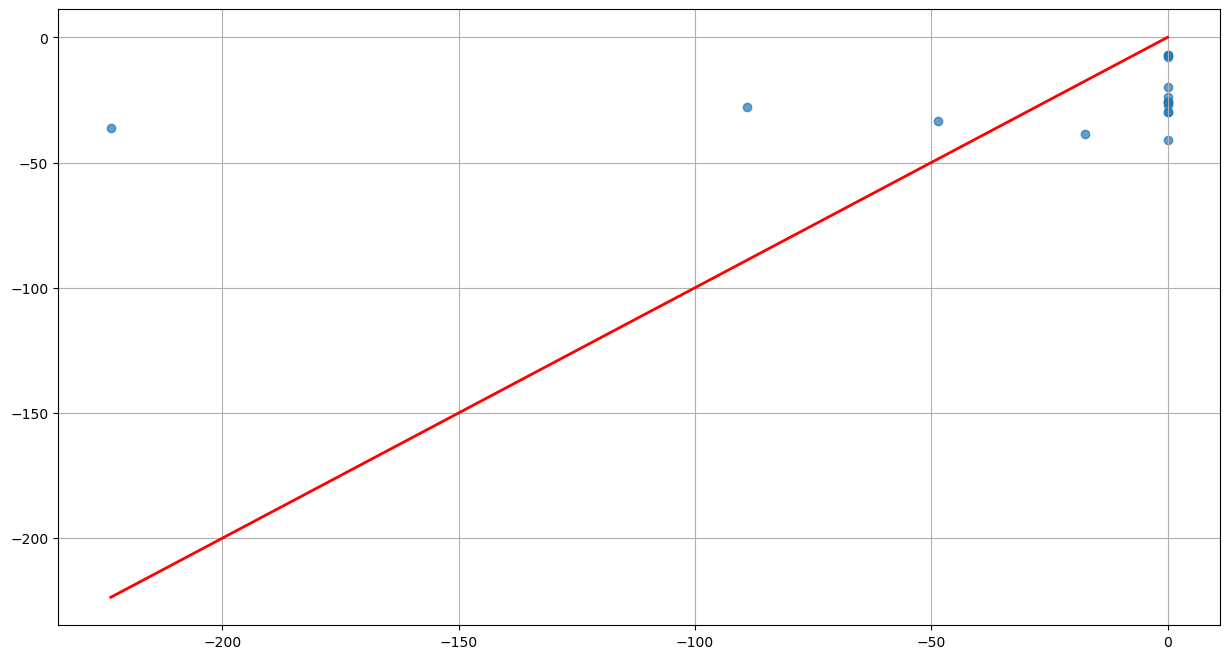

In [43]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid(True)
plt.show()

In [44]:
dc_model = DecisionTreeRegressor()
dc_model.fit(x_train, y_train)
pred = dc_model.predict(x_test)
mce_dc_model = metrics.mean_squared_error(y_test, pred)
print(mce_dc_model)
print("R^2:", dc_model.score(x_test, y_test))

2902.3418055555553
R^2: 0.10036004726294712


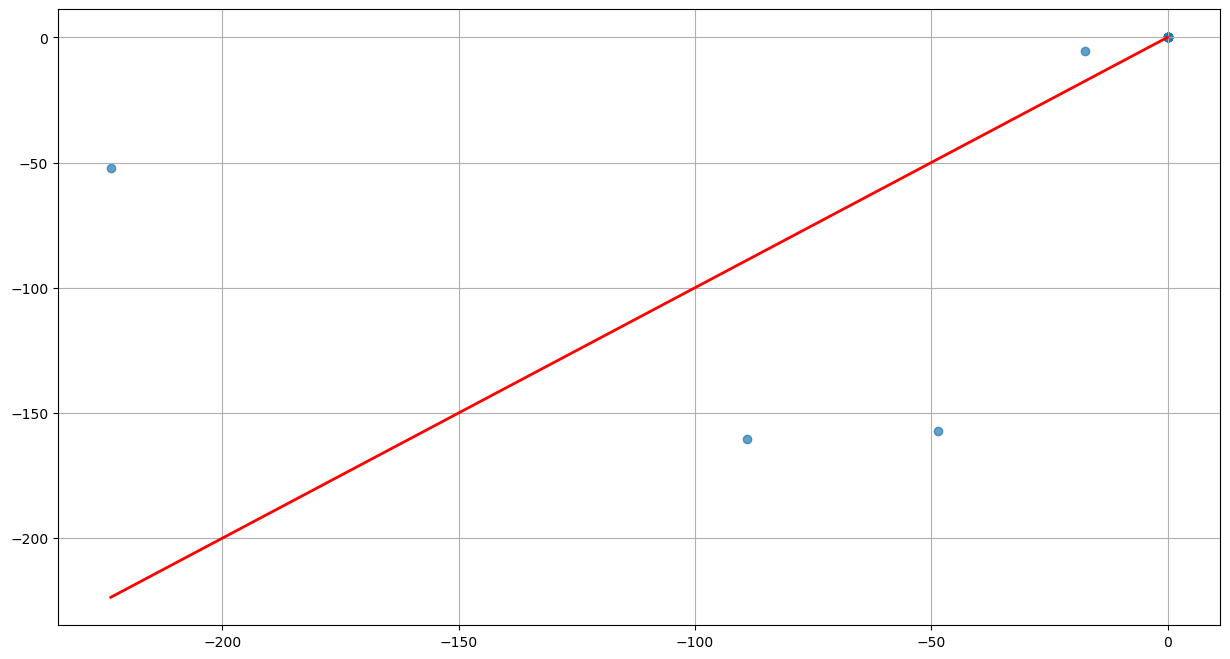

In [45]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid(True)
plt.show()

In [46]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
mce_rf_model = metrics.mean_squared_error(y_test, pred)
print(mce_rf_model)
print("R^2:", rf_model.score(x_test, y_test))

1889.9699003541662
R^2: 0.41416533759930074


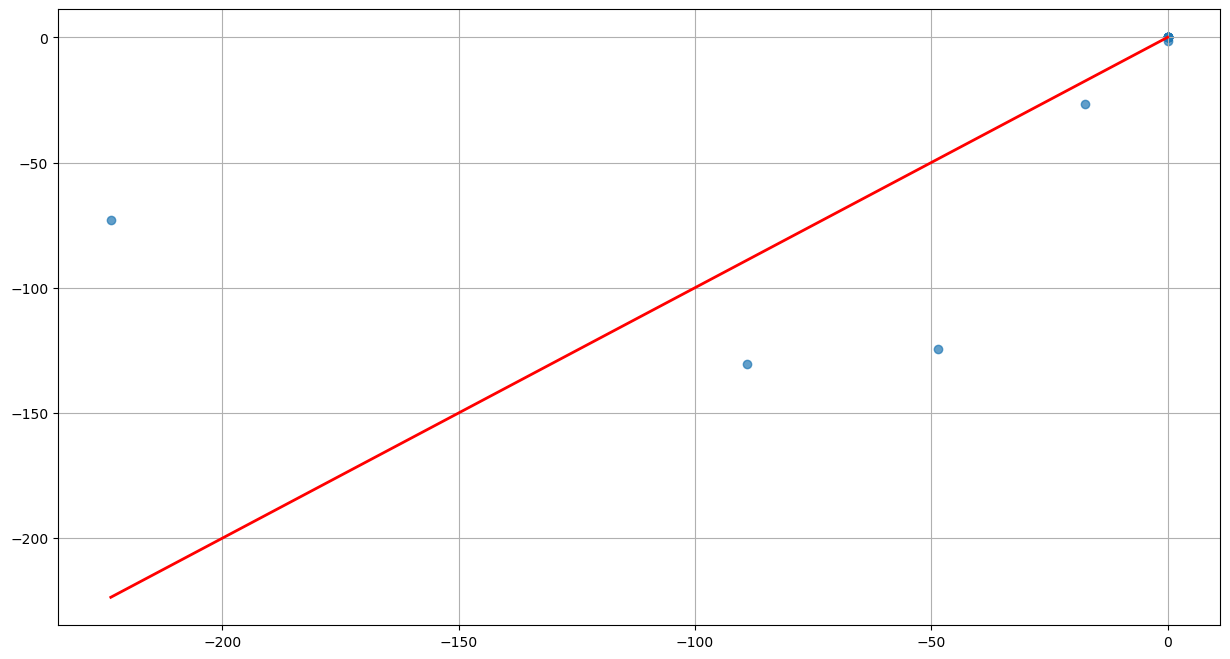

In [47]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid(True)
plt.show()

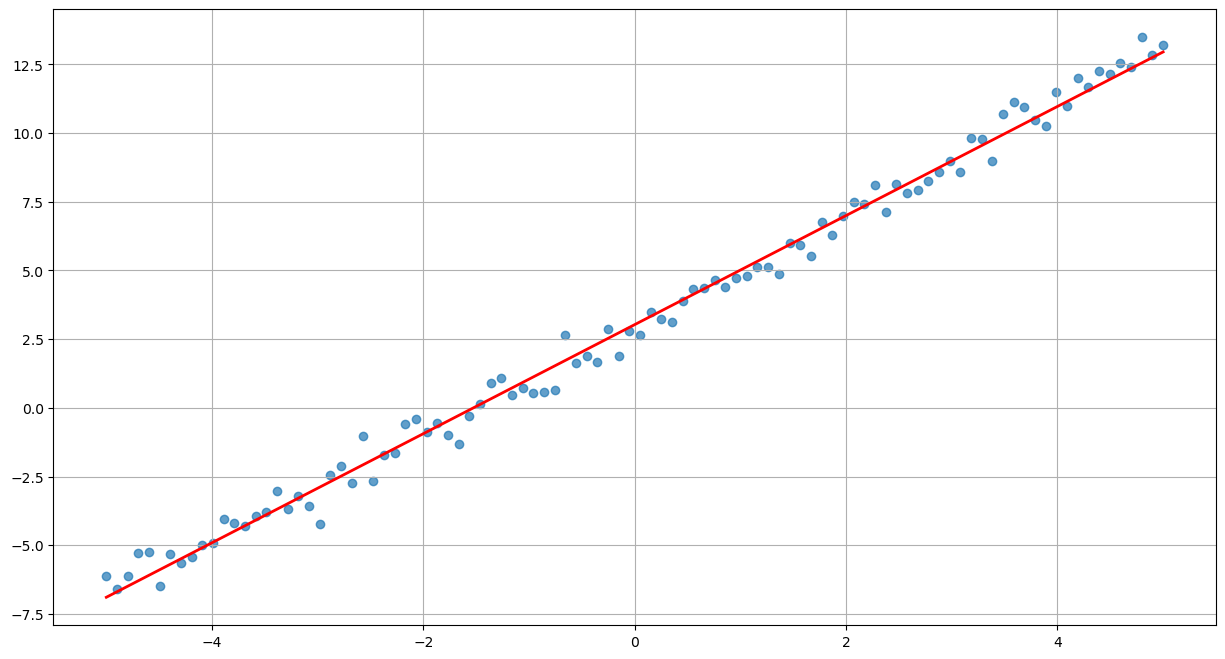

In [48]:
np.random.seed(0)
n = 100
x = np.linspace(-5, 5, n)
y = 2 * x + 3 + np.random.normal(scale=0.5, size=n)

model = linear_model.LinearRegression().fit(x[:, None], y)

yhat = model.predict(x[:, None])

plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, yhat, color='red', linewidth=2)
plt.grid(True)
plt.show()

This is how I imagine the perfect plot, where there are no outliers and all the points follow the line